In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_pickle('202110-gridhunter.pkl')

<AxesSubplot:xlabel='Epoch', ylabel='agent0_avg_rets'>

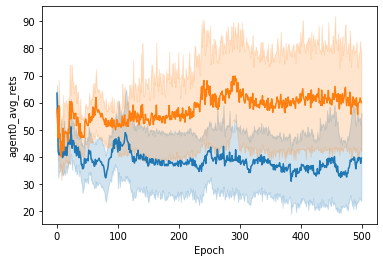

In [3]:
fig, ax = plt.subplots()
sns.lineplot(data=df.groupby('Algo').get_group('SimplePG'), x='Epoch', y='agent0_avg_rets',ax=ax)
sns.lineplot(data=df.groupby('Algo').get_group('StackPG'), x='Epoch', y='agent0_avg_rets',ax=ax)

<AxesSubplot:xlabel='Epoch', ylabel='agent1_avg_rets'>

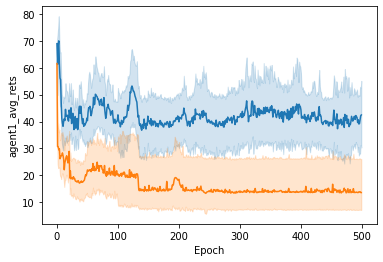

In [4]:
fig, ax = plt.subplots()
sns.lineplot(data=df.groupby('Algo').get_group('SimplePG'), x='Epoch', y='agent1_avg_rets',ax=ax)
sns.lineplot(data=df.groupby('Algo').get_group('StackPG'), x='Epoch', y='agent1_avg_rets',ax=ax)

<AxesSubplot:xlabel='Epoch', ylabel='agent0_loss'>

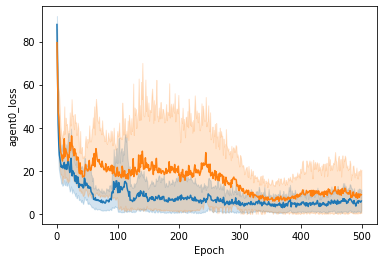

In [5]:
fig,ax = plt.subplots()
sns.lineplot(data=df.groupby('Algo').get_group('SimplePG'), x='Epoch', y='agent0_loss',ax=ax)
sns.lineplot(data=df.groupby('Algo').get_group('StackPG'), x='Epoch', y='agent0_loss',ax=ax)

<AxesSubplot:xlabel='Epoch', ylabel='agent1_loss'>

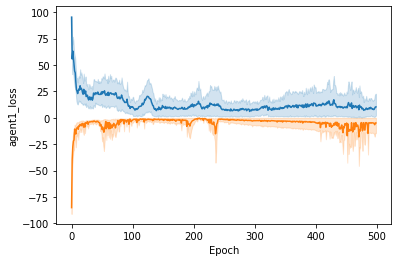

In [6]:
fig,ax = plt.subplots()
sns.lineplot(data=df.groupby('Algo').get_group('SimplePG'), x='Epoch', y='agent1_loss',ax=ax)
sns.lineplot(data=df.groupby('Algo').get_group('StackPG'), x='Epoch', y='agent1_loss',ax=ax)

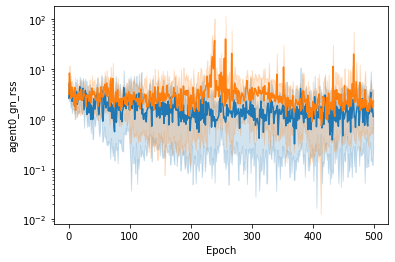

In [7]:
fig,ax = plt.subplots()
sns.lineplot(data=df.groupby('Algo').get_group('SimplePG'), x='Epoch', y='agent0_gn_rss',ax=ax)
sns.lineplot(data=df.groupby('Algo').get_group('StackPG'), x='Epoch', y='agent0_gn_rss',ax=ax)
ax.set_yscale('log')

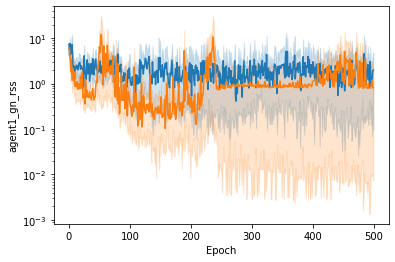

In [8]:
fig,ax = plt.subplots()
sns.lineplot(data=df.groupby('Algo').get_group('SimplePG'), x='Epoch', y='agent1_gn_rss',ax=ax)
sns.lineplot(data=df.groupby('Algo').get_group('StackPG'), x='Epoch', y='agent1_gn_rss',ax=ax)
ax.set_yscale('log')

In [9]:
cols = ['Algo','Epochs','Batch Size','Learning Rate']
group = df.groupby(cols)

scores = dict()
scores_stack = []
scores_sim = []
for params, dat in group:
    ret0 = dat['agent0_avg_rets']
    ret1 = dat['agent1_avg_rets']
    score = sum(ret0 > ret1)/(dat['Epoch'].max()+1)
    if params[0] == 'SimplePG':
        scores_sim.append(score)
    if params[0] == 'StackPG':
        scores_stack.append(score)
    scores[params] = score

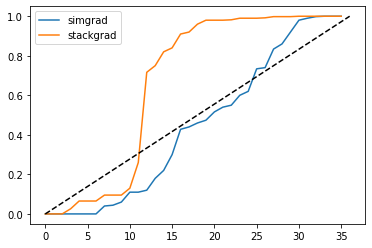

In [10]:
plt.plot(np.sort(scores_sim), label='simgrad')
plt.plot(np.sort(scores_stack), label='stackgrad')
plt.legend()
plt.plot([0,len(scores_stack)],[0,1],'k--')

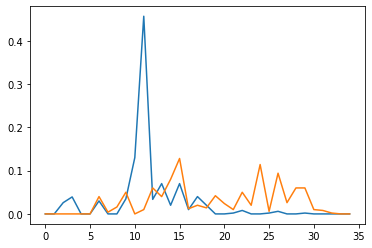

In [11]:
plt.plot(np.diff(np.sort(scores_stack)))
plt.plot(np.diff(np.sort(scores_sim)))

In [12]:
data = []
avg = group.mean()
for params,score in scores.items():
    dat = group.get_group(params)
    ret0 = dat['agent0_avg_rets'].mean()
    ret1 = dat['agent1_avg_rets'].mean()
    loss0 = dat['agent0_loss'].mean()
    loss1 = dat['agent1_loss'].mean()
    data.append([params[0], score, ret0, ret1, loss0, loss1])
data = pd.DataFrame(data,columns=['algo','score','ret0','ret1', 'loss0','loss1'])

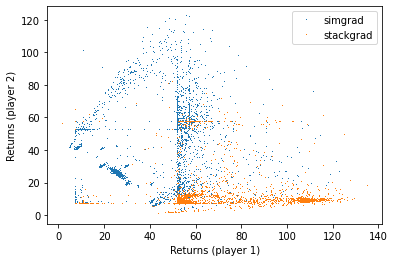

In [25]:
fig,ax = plt.subplots()
df.groupby('Algo').plot('agent0_avg_rets','agent1_avg_rets',marker=',',linestyle='none',ax=ax)
ax.set(xlabel='Returns (player 1)',ylabel='Returns (player 2)')
ax.legend(['simgrad','stackgrad'])

algo
SimplePG    AxesSubplot(0.125,0.125;0.775x0.755)
StackPG     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

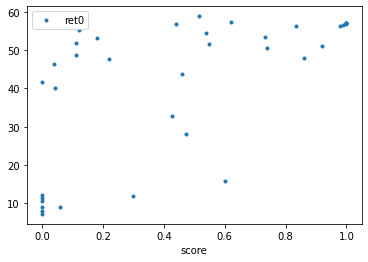

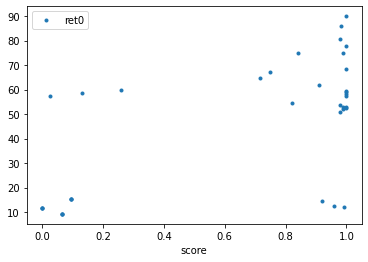

In [27]:
data.groupby('algo').plot('score','ret0',marker='.',linestyle='none')

algo
SimplePG    AxesSubplot(0.125,0.125;0.775x0.755)
StackPG     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

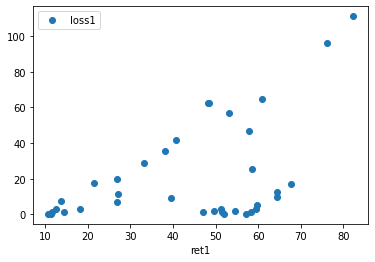

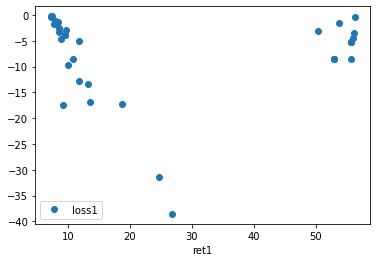

In [14]:
data.groupby('algo').plot('score','ret1',marker='o',linestyle='none')